# Evaluaci√≥n Parcial 2 - An√°lisis Exploratorio de Datos
## Curso: FMY0100 - Fundamentos de Machine Learning  
**Integrantes**: [Thiare Gomez, Guillermo Almendra, Andres Calderon]  
**Fecha de entrega**: [01/07/2025]

El presente proyecto tiene como prop√≥sito analizar el rendimiento individual de los jugadores en las partidas de CS:GO, utilizando la metodolog√≠a CRISP-DM. Esta metodolog√≠a se compone de seis etapas las cuales veremos a lo largo del informe.


## **FASE: Business Understanding**


###Contexto
Counter Strike: Global Offensive (CS:GO) es un videojuego de disparos t√°ctico en primera persona, multijugador y competitivo en el que dos equipos de 5 jugadores, terroristas y contraterroristas, se enfrentan en m√∫ltiples rondas dentro de distintos mapas. El equipo terrorista debe plantar una bomba en uno de los sitios designados dentro del mapa, mientras que los contraterroristas deben evitarlo o desactivarla si es que ya fue colocada.
El dataset contiene m√°s de 7.000 partidas de CS:GO, recolectadas a partir de replays oficiales a trav√©s de un scrapper. Cada replay fue procesado para extraer informaci√≥n individual por jugador y consolidado en un archivo CSV con 79.157 registros, cada uno correspondiente a un jugador en una partida espec√≠fica. Los datos contienen 29 variables que permiten caracterizar el comportamiento de los jugadores como:

-**MatchKills, RoundKills**: N√∫mero de enemigos eliminados por el jugador en una partida o ronda.

-**MatchAssists, RoundAssists**: N√∫mero de veces que el jugador ayud√≥ a eliminar a un enemigo durante una partida o ronda.

-**Survived**: Indica si el jugador sobrevivi√≥ o no al final de la partida o ronda.

-**TimeAlive**: Indica el tiempo en el que el jugador estuvo vivo durante la partida.

-**MatchHeadShots, RoundHeadShots**: N√∫mero de enemigos eliminados por el jugador a trav√©s de un tiro en la cabeza durante la partida o ronda.

-**MatcFlankKills, RoundFlankKills**: N√∫mero de enemigos eliminados por el jugador sin ser visto.

-**PrimaryXXXX**: Porcentaje de uso de armas primarias por categor√≠a (AssaultRifle, SniperRifle, SMG, Heavy y Pistol).

-**TravelledDistance**: Distancia total que recorri√≥ el jugador durante la partida.

Entre otros.

Este conjunto de datos proporciona informaci√≥n y una base s√≥lida para aplicar t√©cnicas de an√°lisis exploratorio y machine learning

###Objetivo de an√°lisis
El objetivo de este an√°lisis es identificar y clasificar el rendimiento de los jugadores de CS:GO y determinar qu√© factores se asocian significativamente con las victorias.
Se busca:
Identificar patrones que permitan distinguir entre jugadores con mal y buen desempe√±o.

Analizar qu√© tan importantes son ciertas estad√≠sticas clave como Kills, Muertes, Asistencias (KDA) en el resultado final de cada partida.

Evaluar si existen tendencias o ventajas seg√∫n los mapas en los que se juegue.

Este an√°lisis permitir√° descubrir la relaci√≥n entre las variables del juego y los resultados que se obtienen, lo que servir√° como base para crear modelos que ayuden a predecir resultados y a mejorar el rendimiento individual de los jugadores.



###Justificaci√≥n
El entendimiento de los factores que influyen en el rendimiento de un jugador y en los resultados de las partidas es clave por varias razones:

-**Contexto competitivo**: conocer las fortalezas y debilidades de cada jugador ayuda a mejorar el estilo de juego y preparar mejores estrategias.

-**Desde el an√°lisis de datos**: proporciona un escenario complejo y realista que permite aplicar t√©cnicas avanzadas de clasificaci√≥n y visualizaci√≥n.

-**Para el dise√±o de estrategias**: los hallazgos pueden servir para orientar decisiones t√°cticas m√°s efectivas, crear planes de entrenamiento o hacer an√°lisis detallados posteriores a cada partida.

-**En desarrollo de software o herramientas de coaching**: esta informaci√≥n puede ser utilizada para el desarrollo de herramientas o software que ayuden a los jugadores a mejorar.

Adem√°s, la industria de los videojuegos, especialmente los e-sports han crecido de forma exponencial en los √∫ltimos a√±os, convirti√©ndose en una industria que no solo mueve millones de d√≥lares, sino que tambi√©n impulsa el desarrollo de nuevas tecnolog√≠as, comunidades y carreras profesionales. Comprender el rendimiento de los jugadores en un entorno competitivo no solo permite ayudar a mejorar su desempe√±o individual, sino que tambi√©n puede influir en las decisiones estrat√©gicas dentro de equipos, entrenamientos e incluso el desarrollo y dise√±o de nuevos juegos. A nivel social, estos tipos de estudio fomentan el uso responsable de los videojuegos y abren oportunidades educativas y laborales en √°reas como el an√°lisis de datos y contribuyen a la creaci√≥n de herramientas que apoyen tanto a los jugadores como a entrenadores.

Para abordar este an√°lisis, se ha optado por la metodolog√≠a CRISP-DM, un enfoque ampliamente utilizado en proyectos de ciencia de datos. Esta metodolog√≠a permitir√° organizar el trabajo en seis etapas definidas, desde la comprensi√≥n del negocio hasta la evaluaci√≥n final del modelo, lo que asegura y facilita el desarrollo ordenado del an√°lisis.


## **FASE : Data Understanding**

Para comenzar con el analisis exploratorio, primero se importan las librerias necesarias.

In [ ]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez importadas las librerias empezaremos el analisis exploratorio.


---

In [ ]:
#empezaremos cargando nuestro Dataset
from google.colab import files
uploaded = files.upload()


Saving CSGOComplete.csv to CSGOComplete.csv


In [ ]:
#esta linea es para que lea el dataframe y el codigo funcione correctamente, si esta linea no se ejecuta ningun otro codigo funcionara
df = pd.read_csv('CSGOComplete.csv')

**Hagamos un analisis exploratorio.** Vayamos de menos a mas

Veamos cuantas columnas y filas tenemos

In [ ]:
df.shape

(1133, 17)

Esto significa que el dataFrame tiene 1133 filas y 17 columnas

In [ ]:
display(df.head())

Map  Day  Month  Year       Date  Wait Time(s)   Match Time(s)  \
0  Mirage    3      8  2018   3/8/2018           327            2906   
1  Mirage    2      8  2018   2/8/2018           336            2592   
2  Mirage   31      7  2018  31/7/2018           414            2731   
3  Mirage   31      7  2018  31/7/2018           317            2379   
4  Mirage   30      7  2018  30/7/2018           340            3467   

   Team A Rounds  Team B Rounds  Ping  Kills  Assists  Deaths  Mvp's  HS%  \
0             16             13   215     17        2      21      2    5   
1             16             11   199     13        4      24      2    0   
2             16             14    85     15        3      18      3   26   
3             11             16    93     12        2      15      2   16   
4             15             15    94     33        5      20      5   30   

   Points Result  
0      45    Win  
1      40   Lost  
2      37    Win  
3      30   Lost  
4      83    Tie

la salida de df.head() muestra las 5 primeras filas del dataframe. Esto da una idea de c√≥mo est√°n organizados los datos y q√∫e tipo de informaci√≥n contiene cada columna.

---

Ahora utilizaremos df.info() para obtener un resumen conciso del Dataframe, incluyendo el tipo de datos de cada columna y la cantidad de valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             1133 non-null   object
 1   Day             1133 non-null   int64 
 2   Month           1133 non-null   int64 
 3   Year            1133 non-null   int64 
 4   Date            1133 non-null   object
 5   Wait Time(s)    1133 non-null   int64 
 6    Match Time(s)  1133 non-null   int64 
 7   Team A Rounds   1133 non-null   int64 
 8   Team B Rounds   1133 non-null   int64 
 9   Ping            1133 non-null   int64 
 10  Kills           1133 non-null   int64 
 11  Assists         1133 non-null   int64 
 12  Deaths          1133 non-null   int64 
 13  Mvp's           1133 non-null   int64 
 14  HS%             1133 non-null   int64 
 15  Points          1133 non-null   int64 
 16  Result          1133 non-null   object
dtypes: int64(14), object(3)
memory usage: 150.6+ KB


La salida de df.info() te proporciona informaci√≥n muy √∫til sobre el DataFrame:

*** La cantidad de Non-Null Count (valores no nulos) en cada columna. En este caso, todas las columnas tienen 1133 valores no nulos, lo que significa que no hay valores faltantes en el conjunto de datos

** El Dtype (tipo de dato) de cada columna. Vemos que la mayor√≠a de las columnas son de tipo int64 (enteros), lo cual es adecuado para datos num√©ricos como rondas, ping, kills, etc. Las columnas 'Map', 'Date' y 'Result' son de tipo object, que generalmente indica texto (strings)

---

Ahora utilizaremos df.describe() para obtener estad√≠sticas descriptivas de las columnas num√©ricas, como la media, desviaci√≥n est√°ndar, valores m√≠nimo y m√°ximo, y los cuartiles.

In [ ]:
df.describe()

Day        Month         Year  Wait Time(s)   Match Time(s)  \
count  1133.000000  1133.000000  1133.000000   1133.000000     1133.000000   
mean     16.598411     7.069726  2016.330980    118.533098     2291.438658   
std       8.711933     3.302142     1.112443    134.129684      474.524327   
min       1.000000     1.000000  2015.000000      0.000000      630.000000   
25%       9.000000     4.000000  2015.000000      9.000000     1942.000000   
50%      18.000000     7.000000  2017.000000     48.000000     2311.000000   
75%      24.000000    10.000000  2017.000000    213.000000     2648.000000   
max      31.000000    12.000000  2018.000000    589.000000     3603.000000   

       Team A Rounds  Team B Rounds         Ping        Kills      Assists  \
count    1133.000000    1133.000000  1133.000000  1133.000000  1133.000000   
mean       12.393645      12.269197    72.494263    14.706090     4.158870   
std         4.539815       4.509403    65.995966     5.948775     2.363482   
min         0.000000       0.000000     0.000000     0.000000     0.000000   
25%         9.000000       9.000000    31.000000    11.000000     2.000000   
50%        15.000000      15.000000    76.000000    14.000000     4.000000   
75%        16.000000      16.000000    92.000000    18.000000     6.000000   
max        16.000000      16.000000   724.000000    36.000000    14.000000   

            Deaths        Mvp's          HS%       Points  
count  1133.000000  1133.000000  1133.000000  1133.000000  
mean     17.034422     1.825243    24.902030    39.217123  
std       4.792483     1.487699    13.672214    14.898022  
min       0.000000     0.000000     0.000000     0.000000  
25%      14.000000     1.000000    16.000000    29.000000  
50%      18.000000     2.000000    23.000000    39.000000  
75%      21.000000     3.000000    33.000000    49.000000  
max      27.000000     8.000000   100.000000    89.000000

A continuaci√≥n, se explican los principales indicadores estad√≠sticos generados por `df.describe()` en pandas:

* **count**: Cantidad de valores no nulos en la columna (confirma lo mostrado por `df.info()`).
* **mean**: Promedio de los valores.
* **std**: Desviaci√≥n est√°ndar, indica cu√°nto se dispersan los datos respecto al promedio.
* **min**: Valor m√≠nimo de la columna.
* **25% (Q1)**: Primer cuartil, el 25% de los datos est√°n por debajo de este valor.
* **50% (Mediana)**: Segundo cuartil, valor central de la distribuci√≥n de los datos.
* **75% (Q3)**: Tercer cuartil, el 75% de los datos est√°n por debajo de este valor.
* **max**: Valor m√°ximo de la columna.


----


### Tipos de variables

valores numericos Discretos y continuos, categoricos BINARIOS:

In [ ]:
#Clasificacion de variables
clasificacion_variables = {}
for col in df.columns:
    if col == "Map" or col == "Result":
        clasificacion_variables[col] = "categorico"
    elif col in ["Day","Month", "Year", "Team A Rounds", "Team B Rounds", "Ping", "Kills", "Assits", "Deaths", "Mvp's", "HS%", "Points"]:
        clasificacion_variables[col] = "Discreto"
    elif col in ["Wait Time(s)", "Match Time(s)"]:
        clasificacion_variables[col] = "Continuo"
    elif col in ["Date"]:
        clasificacion_variables[col] = "Ordinal"


clasificacion_variables = pd.DataFrame(list(clasificacion_variables.items()), columns=['Columna', 'Tipo'])
clasificacion_variables

Columna        Tipo
0             Map  categorico
1             Day    Discreto
2           Month    Discreto
3            Year    Discreto
4            Date     Ordinal
5    Wait Time(s)    Continuo
6   Team A Rounds    Discreto
7   Team B Rounds    Discreto
8            Ping    Discreto
9           Kills    Discreto
10         Deaths    Discreto
11          Mvp's    Discreto
12            HS%    Discreto
13         Points    Discreto
14         Result  categorico

 continuaci√≥n, se clasifican las variables del dataset seg√∫n su tipo:

### Variables Categ√≥ricas
Representan categor√≠as o grupos sin un orden espec√≠fico:

* **Map**
* **Result**

---

### Variables Discretas
Son variables num√©ricas que solo pueden tomar valores enteros:

* **Day**
* **Month**
* **Year**
* **Team A Rounds**
* **Team B Rounds**
* **Ping**
* **Kills**
* **Deaths**
* **Mvp's**
* **HS%**
* **Points**

---

### Variables Continuas
Pueden tomar cualquier valor dentro de un rango, incluyendo decimales:

* **Wait Time (s)**
* **Match Time (s)**

---

### Variable Ordinal
Representa datos con un orden espec√≠fico, en este caso fechas:

* **Date**

> Aunque la variable `Date` fue tratada como ordinal, es importante recordar que tambi√©n tiene propiedades temporales. Dependiendo del an√°lisis (por ejemplo, tendencias a lo largo del tiempo), puede requerir un tratamiento especial.

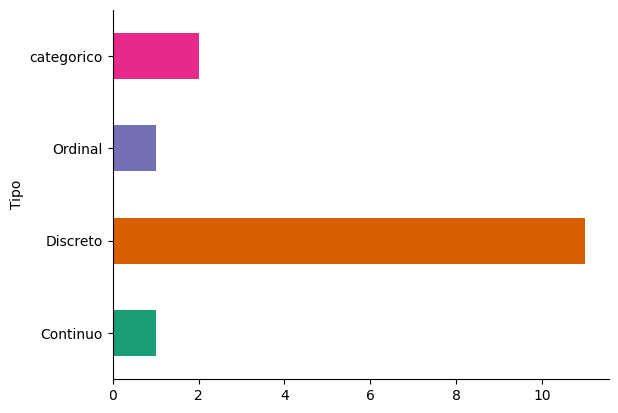

In [ ]:
# @title Tipo

from matplotlib import pyplot as plt
import seaborn as sns
clasificacion_variables.groupby('Tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

El predominio de variables **discretas** sugiere que gran parte del an√°lisis estar√° enfocado en **cuentas y frecuencias** (por ejemplo, n√∫mero de kills, MVPs, o rondas ganadas).




---

ahora si empezamos con algo mas complejo

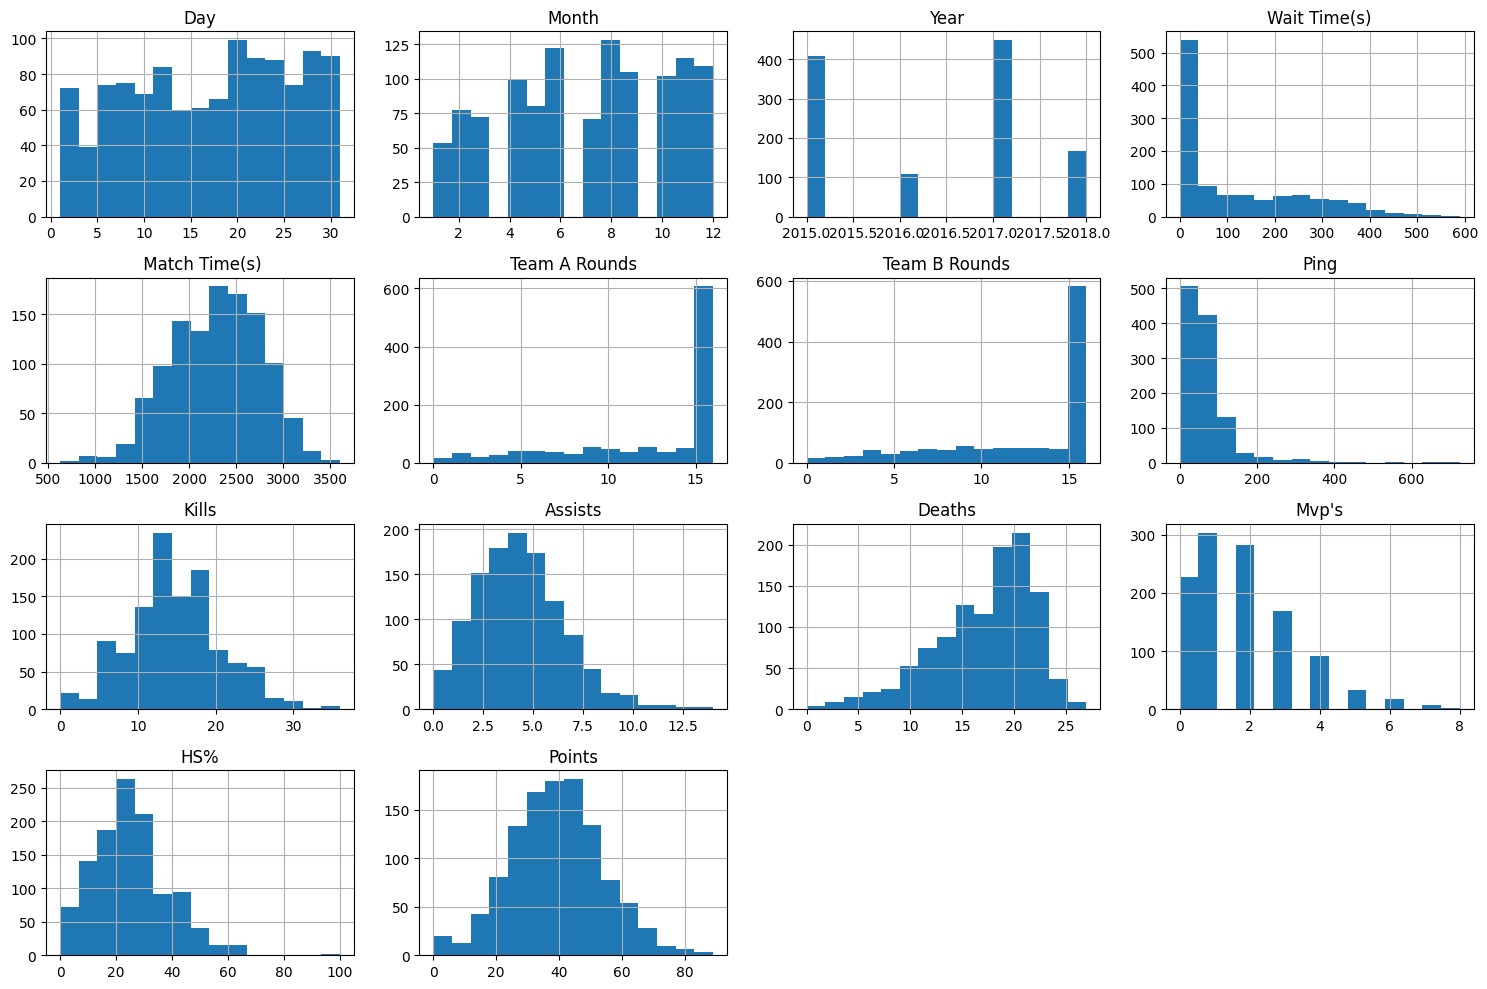

In [ ]:
#visualizacion de desviacion estandar de las columnas del dataset
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

####  Tiempos
- **Wait Time (s)** y **Ping** tienen una distribuci√≥n **sesgada a la derecha** (asimetr√≠a positiva), indicando que la mayor√≠a de los valores son bajos, pero existen algunos valores significativamente m√°s altos (posibles outliers).
- **Match Time (s)** muestra una distribuci√≥n aproximadamente **normal**, centrada alrededor de los 2500 segundos (~41 minutos).

####  Estad√≠sticas de Juego
- **Kills**, **Assists**, **Deaths**, y **Points** presentan distribuciones en forma de **campana** o cercanas a la normal, lo que sugiere que estos eventos tienen un comportamiento central con cierta variabilidad.
- **MVP‚Äôs** est√° **sesgada a la derecha**, ya que la mayor√≠a de los jugadores logran pocos MVPs por partida.
- **HS% (headshot percentage)** muestra una **asimetr√≠a negativa moderada**, con m√°s frecuencia en valores entre 20% y 40%.

####  Rondas de Equipos
- **Team A Rounds** y **Team B Rounds** presentan una distribuci√≥n **altamente concentrada en 15**, probablemente porque 15 es el m√°ximo de rondas ganadas antes del cambio de lado (o una partida completa).

#### Variables Temporales
- **Day**, **Month**, y **Year** tienen distribuciones esperadas:
  - **Day** y **Month** se ven relativamente uniformes.
  - **Year** muestra que la mayor√≠a de los datos se concentran en ciertos a√±os (posiblemente 2016 y 2017).

---




Como son demasiados mapas crearemos otra columna dentro del dataset que se llame "Fmap" (Frecuencia de mapa)

In [ ]:
map_counts = df['Map'].value_counts()
print(map_counts)

Map
Dust II        547
Mirage         363
Inferno        132
Cache           59
Overpass        13
Cobblestone     12
Nuke             4
Austria          1
Canals           1
Italy            1
Name: count, dtype: int64


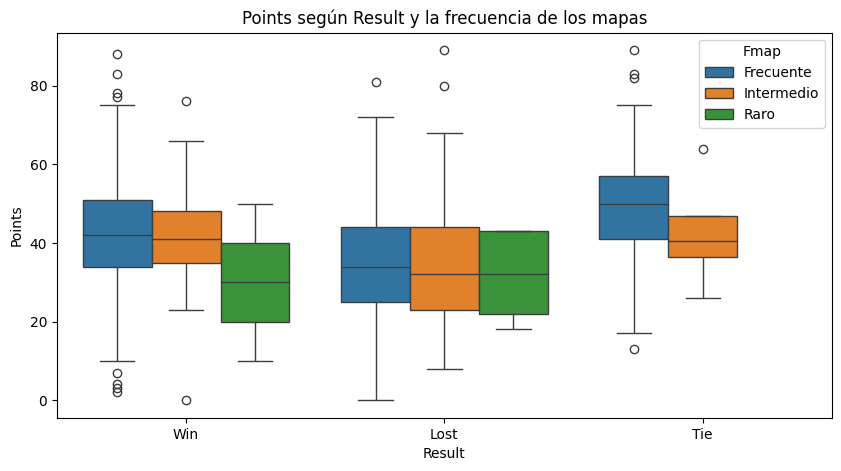

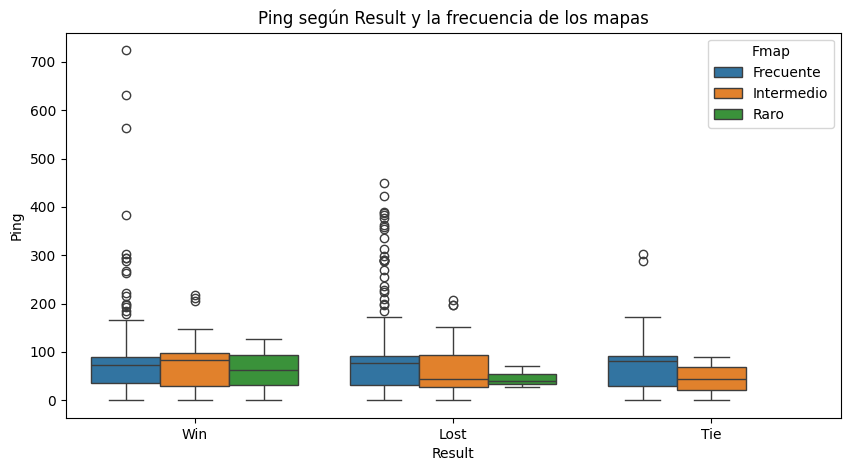

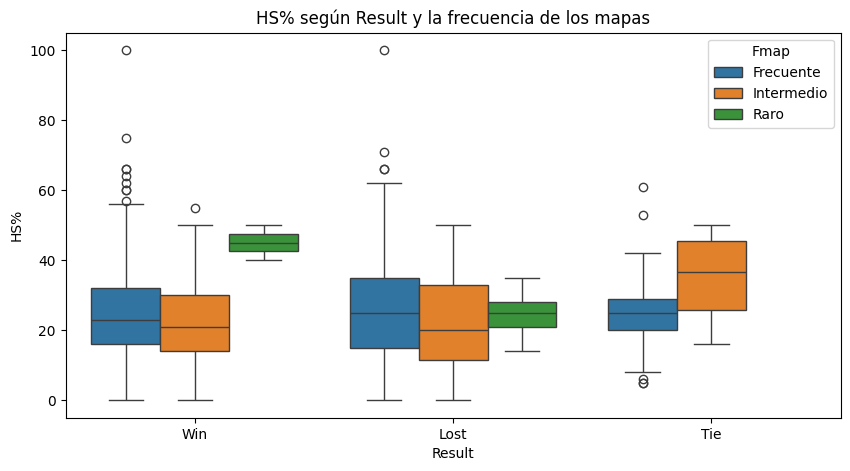

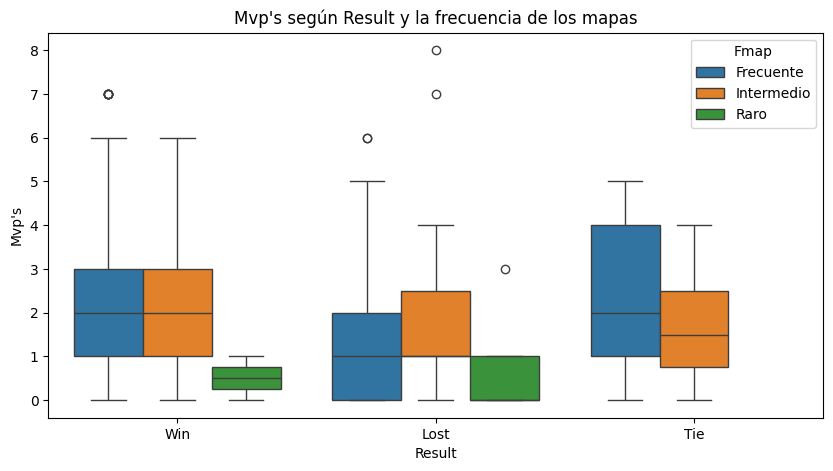

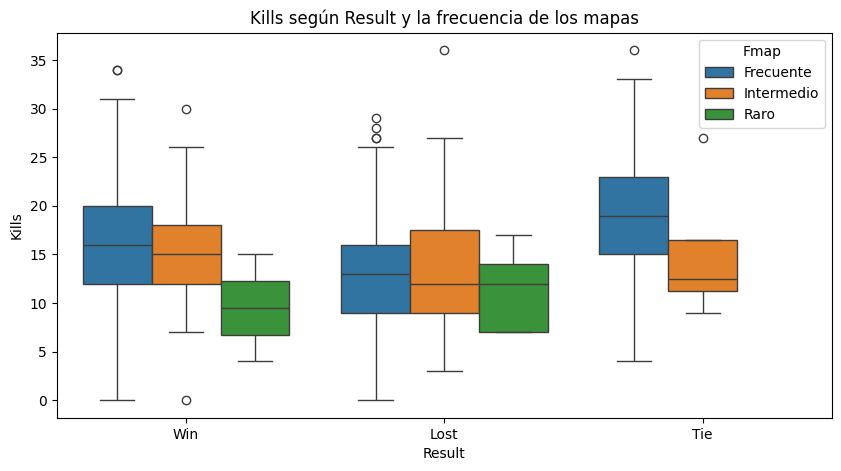

In [ ]:
def map_category(map_name):
    count = map_counts[map_name]
    if count >= 100:
      return 'Frecuente'
    elif count >= 10:
      return 'Intermedio'
    else:
      return 'Raro'

df['Fmap'] = df['Map'].apply(map_category)

variables = ["Points", "Ping", "HS%", "Mvp's", "Kills"]

for var in variables:
    plt.figure(figsize=(10, 5,))
    sns.boxplot(x='Result', y=var, hue='Fmap', data=df)
    plt.title(f'{var} seg√∫n Result y la frecuencia de los mapas')
    plt.show()

###  Observaciones Clave

- En general, los jugadores obtienen m√°s puntos en partidas **ganadas (`Win`)**, especialmente en **mapas frecuentes**, lo cual es coherente con un mejor rendimiento en entornos conocidos.
- Los **mapas raros** muestran medianas m√°s bajas y mayor dispersi√≥n, lo que podr√≠a reflejar menos familiaridad, menor rendimiento o mayor variabilidad.
- En mapas **intermedios**, los puntos tienden a situarse entre los mapas frecuentes y los raros, tanto en partidas ganadas como perdidas.
- En partidas **empatadas (`Tie`)**, los mapas frecuentes siguen mostrando una mayor mediana de puntos, incluso m√°s alta que en victorias. Esto podr√≠a reflejar partidas re√±idas con alto rendimiento individual.

Este gr√°fico sugiere que la **frecuencia de los mapas influye en el rendimiento**, medido por los puntos obtenidos. Jugar en mapas m√°s conocidos se asocia con un rendimiento m√°s alto, mientras que los mapas menos jugados tienden a resultados m√°s bajos y variables.

Este tipo de visualizaci√≥n es √∫til para:

- **Evaluar impacto del entorno** (mapa) en el desempe√±o.
- **Identificar relaciones entre variables categ√≥ricas y num√©ricas**.
- **Informar estrategias de entrenamiento**, enfoc√°ndose en mapas menos frecuentes.


Lo que se le hizo al dataset fue agregarle otra columna donde se agrupan los mapas por la frecuencia de cada uno de estos, para simplificar los analisis y visualizaciones.

---

###Datos estadisticos:

In [ ]:
#Datos estadisticos
col = ["Team A Rounds", "Team B Rounds",        "Ping", "Kills", "Assists",     "Deaths",       "Mvp's", "HS%", "Points"]

estadisticas = {
    'Media': df[col].mean(),
    'Mediana': df[col].median(),
    'Desviaci√≥n est√°ndar': df[col].std(),
    'M√≠nimo': df[col].min(),
    'M√°ximo': df[col].max()
}
pd.DataFrame(estadisticas)

Media  Mediana  Desviaci√≥n est√°ndar  M√≠nimo  M√°ximo
Team A Rounds  12.393645     15.0             4.539815       0      16
Team B Rounds  12.269197     15.0             4.509403       0      16
Ping           72.494263     76.0            65.995966       0     724
Kills          14.706090     14.0             5.948775       0      36
Assists         4.158870      4.0             2.363482       0      14
Deaths         17.034422     18.0             4.792483       0      27
Mvp's           1.825243      2.0             1.487699       0       8
HS%            24.902030     23.0            13.672214       0     100
Points         39.217123     39.0            14.898022       0      89

- **Media (Mean)**:  
  Es el promedio de los valores.  
  *Ejemplo:* El promedio de **Kills** por partida es **14.7**, lo que indica el valor t√≠pico que un jugador obtiene en una partida.

- **Mediana (Median)**:  
  Es el valor central cuando los datos est√°n ordenados. Si la mediana es muy diferente de la media, puede indicar una distribuci√≥n sesgada o la presencia de valores at√≠picos.  
  *Ejemplo:* Para **Team A Rounds** y **Team B Rounds**, la mediana es **15**, mientras que la media es aproximadamente **12.3 / 12.2**, lo que sugiere que muchas partidas terminan con un equipo ganando las 15 rondas necesarias para el cambio de lado, pero hay tambi√©n resultados con menos rondas que bajan el promedio.

- **Desviaci√≥n est√°ndar (Standard Deviation)**:  
  Mide qu√© tan dispersos est√°n los datos respecto a la media.  
  - **Alta desviaci√≥n est√°ndar**: los valores est√°n muy dispersos.  
  - **Baja desviaci√≥n est√°ndar**: los valores est√°n agrupados cerca de la media.  
  *Ejemplo:* **Ping** tiene una desviaci√≥n est√°ndar alta (**~66 ms**), lo que indica una variabilidad considerable en la calidad de conexi√≥n entre jugadores.

- **M√≠nimo (Minimum)**:  
  Es el valor m√°s bajo registrado en la columna. √ötil para detectar valores extremos bajos o errores en los datos.

- **M√°ximo (Maximum)**:  
  Es el valor m√°s alto registrado en la columna. Ayuda a identificar posibles valores at√≠picos o desempe√±os excepcionales.

---

Estas estad√≠sticas son fundamentales para obtener una primera impresi√≥n del comportamiento de los datos y para detectar posibles problemas o patrones interesantes antes de aplicar modelos o visualizaciones m√°s avanzadas.

**MAPA DE CORRELACIONES**

Con este mapa podremos identificar de mejor manera los factores de riesgo y priorizar cuales son las variables usar en el modelado

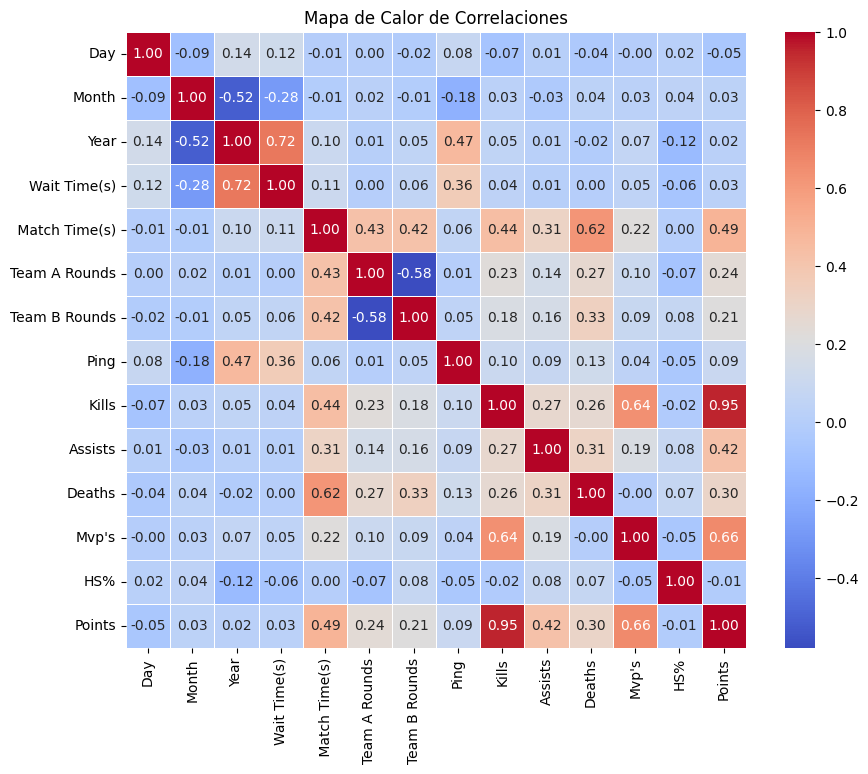

In [ ]:
orden_columnas = ["Team A Rounds", "Team B Rounds",	"Ping",	"Kills",	"Assists",	"Deaths",	"Mvp's",	"HS%",	"Points"]


columnas_numericas = df.select_dtypes(include=['number'])


correlacion = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


-  **`Points` est√° altamente correlacionado con `Kills` (0.95)**:  
  Esto indica que la cantidad de kills es el mayor determinante del puntaje total. Tambi√©n muestra correlaciones positivas notables con `Mvp's` (0.66) y `Assists` (0.42).

-  **`Kills` y `Mvp's` (0.64)**:  
  Un n√∫mero alto de kills suele estar asociado a ser el jugador m√°s valioso.

-  **`Match Time (s)`** muestra correlaciones positivas con:
  - `Deaths` (0.62)
  - `Kills` (0.44)
  - `Points` (0.49)  
  Esto sugiere que en partidas m√°s largas, los jugadores tienden a acumular m√°s estad√≠sticas.

-  **`Ping` tiene baja correlaci√≥n con las dem√°s variables**:  
  Aunque se esperaba que pudiera afectar el rendimiento, no parece tener impacto fuerte sobre `Kills`, `Points`, ni `Deaths`.

-  **`Team A Rounds` y `Team B Rounds` tienen correlaci√≥n negativa entre s√≠ (-0.58)**:  
  Esto es l√≥gico, ya que cuando un equipo gana m√°s rondas, el otro necesariamente gana menos.

## FASE 3: DATA PREPARATION

Lo que haremos a continuacion una vez de entender los datos, es poder modificar algunas variables, en este caso modificaremos la variable RESULT, ya que es nuestra variable TARGET.

Atencion hay 2 lineas de codigo, la variable result es categorica, una linea de codigo reemplaza los datos ya existentes en la variable result, y la otra mantiene la columna original pero crea otra con los datos numerico.

Win = 0, Tie = 1, Lost = 2

In [ ]:
#CREA UNA NUEVA COLUMNA
Nresult = {'Win': 0, 'Tie': 1, 'Lost': 2}
df['Nresult'] = df['Result'].map(Nresult)


In [ ]:
#REEMPLAZA DIRECTAMENTE EN LA NUEVA COLUMNA
df['Result'] = df['Result'].map({'Win': 0, 'Tie': 1, 'Lost': 2})

In [ ]:
# Eliminar espacios en blanco al inicio o fin de cada nombre de columna
df.columns = df.columns.str.strip()

In [ ]:
# Seleccionar las variables de entrada (features) basadas en la correlaci√≥n con 'Points' y la columna 'Map'
features = ['Kills', "Mvp's", 'Assists', 'Deaths', 'HS%', 'Map']
target = 'Points'

X = df[features]
y = df[target]

print("Variables de entrada (X):")
display(X.head())
print("\nVariable objetivo (y):")
display(y.head())

Variables de entrada (X):


Kills  Mvp's  Assists  Deaths  HS%     Map
0     17      2        2      21    5  Mirage
1     13      2        4      24    0  Mirage
2     15      3        3      18   26  Mirage
3     12      2        2      15   16  Mirage
4     33      5        5      20   30  Mirage


Variable objetivo (y):


0    45
1    40
2    37
3    30
4    83
Name: Points, dtype: int64

##  Agrupaci√≥n de Mapas Poco Frecuentes

Durante el an√°lisis exploratorio, se detect√≥ que la mayor√≠a de las partidas se concentran en **unos pocos mapas populares**, como:

- **Dust II**
- **Inferno**
- **Mirage**

Mientras tanto, otros mapas aparecen **muy pocas veces**, lo que puede generar **problemas** al codificarlos:

###  Problemas de mantener todos los mapas como categor√≠as individuales:

- **Alta dimensionalidad** al aplicar OneHotEncoder (cada mapa se convierte en una columna).
- **Sparsidad** en los datos (muchas columnas con ceros).
- **Sobreajuste**: el modelo puede aprender patrones espurios de mapas raros que no se generalizan bien.

---

In [ ]:
# Agrupar mapas con baja frecuencia como "Otros"
umbral_frecuencia = 50  # Puedes ajustar este valor
map_counts = df['Map'].value_counts()
mapas_frecuentes = map_counts[map_counts >= umbral_frecuencia].index

# Reemplazar mapas poco frecuentes por 'Otros'
df['Map'] = df['Map'].apply(lambda m: m if m in mapas_frecuentes else 'Otros')

# Verificar resultado
print("Mapas finales considerados:")
print(df['Map'].value_counts())

Mapas finales considerados:
Map
Dust II    547
Mirage     363
Inferno    132
Cache       59
Otros       32
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separar columnas num√©ricas y categ√≥ricas
numerical_features = [col for col in features if col != 'Map']
categorical_features = ['Map']

# Preprocesamiento: escalar num√©ricas, codificar categ√≥ricas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

Se opt√≥ por agrupar los mapas con baja frecuencia como "Otros", conservando √∫nicamente los mapas que tienen al menos 50 partidas registradas.

---

ahora vamos a dividir el dataset para el entranamiento de los modelos
seleccionados
- **Conjunto de entrenamiento (80%)**: se utiliza para ajustar los par√°metros del modelo.
- **Conjunto de prueba (20%)**: se reserva para evaluar el rendimiento del modelo en datos no vistos.

In [ ]:
from sklearn.model_selection import train_test_split

# Divisi√≥n de los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Con esto hemos dejado los datos listos para aplicar nuestros modelos de regresi√≥n.
--

## Fase: Modeling

En esta fase aplicamos dos modelos de regresi√≥n para predecir el puntaje (`Points`) de los jugadores en partidas de CSGO:

1. **Regresi√≥n Lineal M√∫ltiple**
2. **√Årbol de Decisi√≥n para Regresi√≥n**

Ambos modelos fueron vistos en clases y se comparar√°n mediante m√©tricas est√°ndar: **RMSE** (error cuadr√°tico medio) y **R¬≤** (coeficiente de determinaci√≥n).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear pipeline con preprocesamiento + modelo
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar modelo
lr_pipeline.fit(X_train, y_train)

# Predecir
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluaci√≥n
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Regresi√≥n Lineal M√∫ltiple:")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R¬≤: {lr_r2:.3f}")

Regresi√≥n Lineal M√∫ltiple:
RMSE: 3.73
R¬≤: 0.932


Los resultados de la Regresi√≥n Lineal M√∫ltiple sugieren que el modelo entrenado es muy bueno prediciendo los puntos que un jugador obtendr√° en una partida de CS:GO, bas√°ndose en las variables que seleccionaste. El bajo RMSE y el alto R¬≤ son indicadores positivos de su rendimiento predictivo

## √Årbol de Decisi√≥n para Regresi√≥n

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# √Årbol ajustado para evitar sobreajuste
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_r2 = r2_score(y_test, y_pred_tree)

print("√Årbol de Decisi√≥n (ajustado):")
print(f"RMSE: {tree_rmse:.2f}")
print(f"R¬≤: {tree_r2:.3f}")

√Årbol de Decisi√≥n (ajustado):
RMSE: 5.12
R¬≤: 0.872


Al comparar el √Årbol de Decisi√≥n con la Regresi√≥n Lineal M√∫ltiple, observamos que la Regresi√≥n Lineal tuvo un mejor rendimiento en el conjunto de prueba, con un RMSE m√°s bajo y un R¬≤ m√°s alto. Esto sugiere que, para este problema particular y con las caracter√≠sticas seleccionadas, el modelo lineal fue m√°s efectivo para capturar la relaci√≥n entre las variables de entrada y los puntos obtenidos.

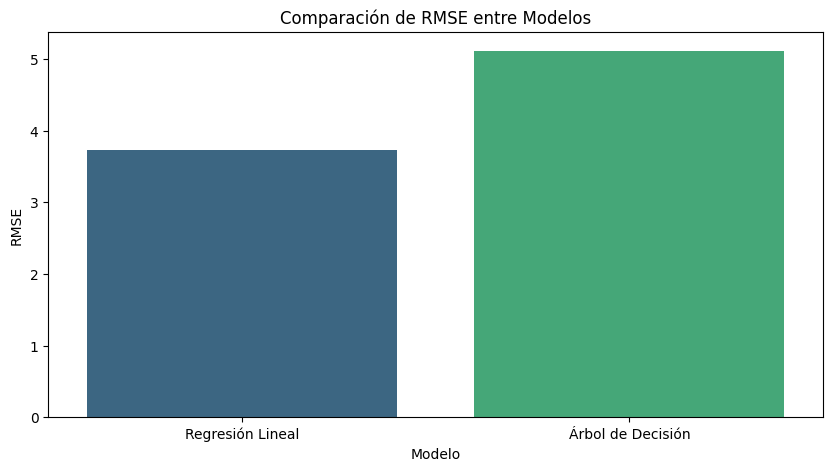

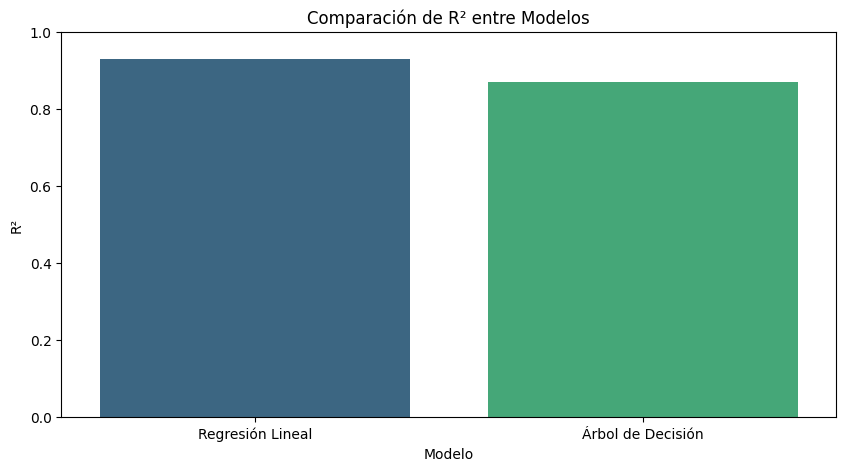

In [ ]:
# Crear un DataFrame para comparar las m√©tricas
modelos = ['Regresi√≥n Lineal', '√Årbol de Decisi√≥n']
rmse_valores = [lr_rmse, tree_rmse]
r2_valores = [lr_r2, tree_r2]

comparacion_df = pd.DataFrame({
    'Modelo': modelos,
    'RMSE': rmse_valores,
    'R¬≤': r2_valores
})

# Gr√°fico de barras para comparar RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='RMSE', data=comparacion_df, palette='viridis')
plt.title('Comparaci√≥n de RMSE entre Modelos')
plt.ylabel('RMSE')
plt.show()

# Gr√°fico de barras para comparar R¬≤
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='R¬≤', data=comparacion_df, palette='viridis')
plt.title('Comparaci√≥n de R¬≤ entre Modelos')
plt.ylabel('R¬≤')
plt.ylim(0, 1) # R2 values are between 0 and 1
plt.show()

## Comparaci√≥n de Modelos de Regresi√≥n

Hemos evaluado dos modelos de regresi√≥n para predecir los **Puntos** (`Points`) de los jugadores bas√°ndonos en las caracter√≠sticas seleccionadas:

1.  **Regresi√≥n Lineal M√∫ltiple**
2.  **√Årbol de Decisi√≥n para Regresi√≥n (ajustado)**

A continuaci√≥n, se presentan las m√©tricas de rendimiento obtenidas en el conjunto de prueba:

| Modelo                       | RMSE | R¬≤    |
| :--------------------------- | :--- | :---- |
| Regresi√≥n Lineal M√∫ltiple    | 3.73 | 0.932 |
| √Årbol de Decisi√≥n (ajustado) | 5.12 | 0.872 |



ahora con el modelado finalizado, pasaremos a la fase de evaluaci√≥n del modelo



---

# FASE 5: Evaluaci√≥n

En esta fase analizamos en detalle el rendimiento de los dos modelos aplicados: Regresi√≥n Lineal M√∫ltiple y √Årbol de Decisi√≥n.

Se utilizaron las siguientes m√©tricas:

- **RMSE (Root Mean Squared Error)**: mide el error promedio en las predicciones.
- **R¬≤ (Coeficiente de determinaci√≥n)**: mide qu√© tan bien el modelo explica la variaci√≥n del target (`Points`).

Adem√°s, realizamos visualizaciones para comparar los valores reales vs. los predichos.

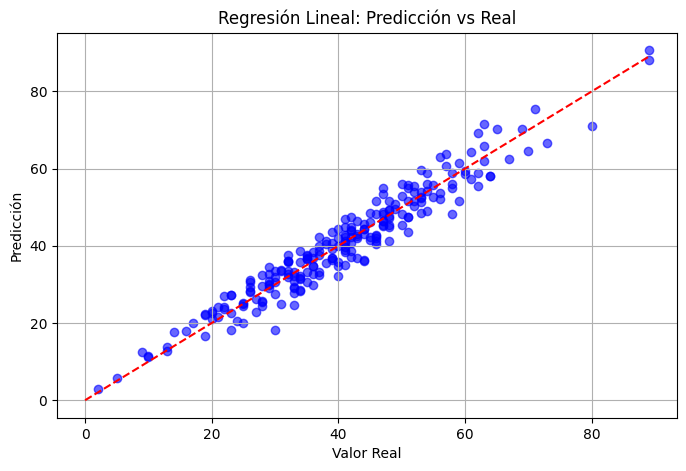

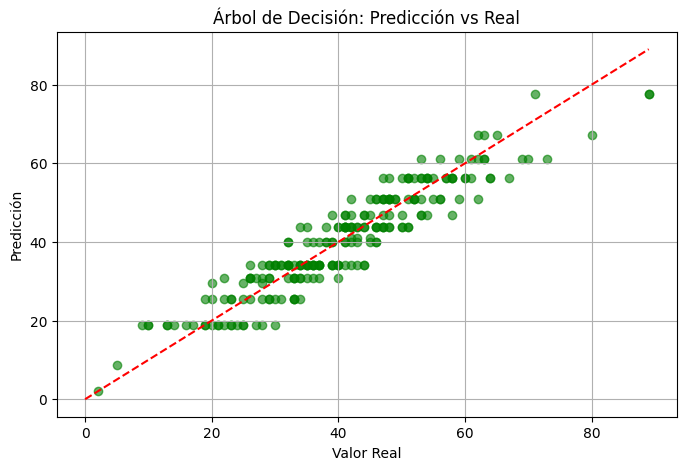

In [ ]:
import matplotlib.pyplot as plt

# Regresi√≥n Lineal
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Regresi√≥n Lineal: Predicci√≥n vs Real")
plt.xlabel("Valor Real")
plt.ylabel("Predicci√≥n")
plt.grid(True)
plt.show()

# √Årbol de Decisi√≥n
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("√Årbol de Decisi√≥n: Predicci√≥n vs Real")
plt.xlabel("Valor Real")
plt.ylabel("Predicci√≥n")
plt.grid(True)
plt.show()



Observando los gr√°ficos de dispersi√≥n de Predicci√≥n vs. Real:

*   **Regresi√≥n Lineal M√∫ltiple**: Los puntos se agrupan **muy cerca de la l√≠nea diagonal roja**, lo que indica que las predicciones del modelo lineal son **altamente precisas** y se ajustan bien a los valores reales. Esto visualiza el alto R¬≤ y bajo RMSE.

*   **√Årbol de Decisi√≥n**: Los puntos muestran **mayor dispersi√≥n** alrededor de la l√≠nea diagonal en comparaci√≥n con la Regresi√≥n Lineal. Aunque sigue la tendencia, las predicciones son **menos precisas** en promedio. Esto es coherente con su menor R¬≤ y mayor RMSE.

 La Regresi√≥n Lineal M√∫ltiple muestra un ajuste visualmente superior a los datos, con predicciones m√°s cercanas a los valores reales que el √Årbol de Decisi√≥n.

### Comparaci√≥n Visual de Predicci√≥n para un Jugador Espec√≠fico

Se visualiza el puntaje (`Points`) estimado para un jugador espec√≠fico, seleccionado aleatoriamente del dataset real, utilizando ambos modelos entrenados:

*   **Regresi√≥n Lineal M√∫ltiple**
*   **√Årbol de Decisi√≥n para Regresi√≥n**

**(Insertar aqu√≠ la salida del c√≥digo que muestra el jugador de ejemplo y las predicciones)**

**Interpretaci√≥n de la Predicci√≥n de Ejemplo:**

*   Para el jugador seleccionado, ambos modelos predijeron puntajes muy cercanos: **{pred_lr:.2f} puntos** por la Regresi√≥n Lineal y **{pred_tree:.2f} puntos** por el √Årbol de Decisi√≥n.
*   En este caso particular, ambos modelos clasificaron al jugador de manera similar seg√∫n el umbral de 50 puntos (mostrando `‚úÖ Buen jugador` o `‚ùå mal jugador`).
*   La peque√±a diferencia entre las predicciones de los modelos para este jugador de ejemplo refuerza la consistencia en sus resultados, aunque la evaluaci√≥n general mostr√≥ que la Regresi√≥n Lineal fue ligeramente superior en el conjunto de prueba.

Esta demostraci√≥n visual de la predicci√≥n es √∫til para:

*   Validar la capacidad de los modelos para generar puntajes coherentes para un jugador individual.
*   Ilustrar de manera concreta c√≥mo se usar√≠an los modelos para predecir el rendimiento en la pr√°ctica.

Esta funcionalidad podr√≠a ser la base para una herramienta que eval√∫e o pronostique el rendimiento de jugadores en CS:GO, permitiendo quiz√°s ingresar datos de un jugador para obtener una estimaci√≥n de sus puntos esperados en una partida.

---

en el siguiente codigo, traemos datos aleatorios del mismo dataset para predecir si el jugador es bueno o malo, con el umbral de 50 puntos,

In [ ]:
import random
# Elegir una fila aleatoria del dataset real
fila_aleatoria = df.sample(1, random_state=random.randint(0, 999)).copy()

# Guardar solo las columnas necesarias para el modelo
# Nota: Aqu√≠ usamos las columnas que el modelo espera como input,
# que son las mismas que usamos para X_train/X_test
columnas_modelo = ['Kills', "Mvp's", 'Assists', 'Deaths', 'HS%', 'Map']


df_jugador = fila_aleatoria[columnas_modelo]

# Predicci√≥n con ambos modelos
# Se usa .predict() en el pipeline, que aplica el preprocesamiento autom√°ticamente
pred_lr = lr_pipeline.predict(df_jugador)[0]
pred_tree = tree_pipeline.predict(df_jugador)[0]

# Clasificaci√≥n seg√∫n umbral
umbral = 50
clas_lr = "‚úÖ Buen jugador" if pred_lr >= umbral else "‚ùå mal jugador"
clas_tree = "‚úÖ buen jugador" if pred_tree >= umbral else "‚ùå mal jugador"

# Mostrar resultados
print("üé≤ Jugador tomado del dataset real:")
print(df_jugador.to_string(index=False))
print("\nüîç Predicci√≥n de Puntaje:")
print(f"- Regresi√≥n Lineal M√∫ltiple: {pred_lr:.2f} puntos ‚Üí {clas_lr}")
print(f"- √Årbol de Decisi√≥n:         {pred_tree:.2f} puntos ‚Üí {clas_tree}")

üé≤ Jugador tomado del dataset real:
 Kills  Mvp's  Assists  Deaths  HS%     Map
     1      0        2       0  100 Dust II

üîç Predicci√≥n de Puntaje:
- Regresi√≥n Lineal M√∫ltiple: 4.53 puntos ‚Üí ‚ùå mal jugador
- √Årbol de Decisi√≥n:         2.06 puntos ‚Üí ‚ùå mal jugador


---

el el siguiente bloque de de codigo es similar al anterior pero este no trae datos de dataset, sino m√°s bien los genere de forma aleatoria utilizando random.randint

In [ ]:
import random
import pandas as pd

# Mapas despu√©s de agrupar: los frecuentes m√°s 'Otros'
mapas_disponibles = ['Dust II', 'Inferno', 'Mirage', 'Otros']

# Crear datos aleatorios realistas
jugador_random = {
    'Map': random.choice(mapas_disponibles),
    'Wait Time(s)': random.randint(5, 60),
    'Match Time(s)': random.randint(600, 1800),
    'Team A Rounds': random.randint(0, 16),
    'Team B Rounds': random.randint(0, 16),
    'Ping': random.randint(20, 100),
    'Kills': random.randint(0, 40),
    'Assists': random.randint(0, 10),
    'Deaths': random.randint(0, 30),
    "Mvp's": random.randint(0, 10),
    'HS%': random.randint(0, 100)
}

# Convertir a DataFrame
df_random = pd.DataFrame([jugador_random])

# Predicci√≥n con ambos modelos
pred_lr = lr_pipeline.predict(df_random)[0]
pred_tree = tree_pipeline.predict(df_random)[0]

# Clasificaci√≥n seg√∫n umbral (ej: 50 puntos)
umbral = 50
clas_lr = "‚úÖ Buen jugador" if pred_lr >= umbral else "‚ùå mal jugador"
clas_tree = "‚úÖ buen jugador" if pred_tree >= umbral else "‚ùå mal jugador"

# Mostrar resultados
print("üé≤ Jugador aleatorio generado:")
print(df_random.to_string(index=False))
print("\nüîç Predicci√≥n de Puntaje:")
print(f"- Regresi√≥n Lineal M√∫ltiple: {pred_lr:.2f} puntos ‚Üí {clas_lr}")
print(f"- √Årbol de Decisi√≥n:         {pred_tree:.2f} puntos ‚Üí {clas_tree}")


üé≤ Jugador aleatorio generado:
    Map  Wait Time(s)  Match Time(s)  Team A Rounds  Team B Rounds  Ping  Kills  Assists  Deaths  Mvp's  HS%
Inferno            48           1745              5              1    50     20        9      19      1   90

üîç Predicci√≥n de Puntaje:
- Regresi√≥n Lineal M√∫ltiple: 53.81 puntos ‚Üí ‚úÖ Buen jugador
- √Årbol de Decisi√≥n:         50.86 puntos ‚Üí ‚úÖ buen jugador


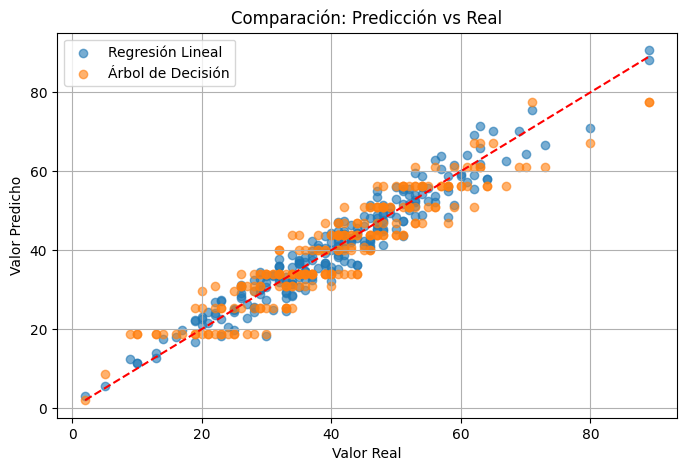

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label='Regresi√≥n Lineal', alpha=0.6)
plt.scatter(y_test, y_pred_tree, label='√Årbol de Decisi√≥n', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Comparaci√≥n: Predicci√≥n vs Real")
plt.legend()
plt.grid(True)
plt.show()

Este gr√°fico muestra las predicciones de ambos modelos (Regresi√≥n Lineal en azul, √Årbol de Decisi√≥n en verde) frente a los valores reales. La l√≠nea diagonal roja representa la predicci√≥n perfecta.

*   Los puntos azules (Regresi√≥n Lineal) se agrupan m√°s cerca de la l√≠nea roja que los puntos verdes (√Årbol de Decisi√≥n).
*   Esto significa que las predicciones de la Regresi√≥n Lineal est√°n, en promedio, m√°s cerca de los valores reales que las del √Årbol de Decisi√≥n.

En resumen, el gr√°fico confirma visualmente que el modelo de Regresi√≥n Lineal tuvo un mejor rendimiento predictivo que el √Årbol de Decisi√≥n en este conjunto de datos.

## **FASE: Deployment**

### **Implementaci√≥n y Aplicaci√≥n Pr√°ctica**

Los resultados obtenidos en el an√°lisis exploratorio y el modelado predictivo nos permiten identificar patrones clave que influyen en el rendimiento de los jugadores de CS:GO. Estos hallazgos tienen aplicaciones pr√°cticas para mejorar estrategias individuales y de equipo.

#### **Principales Hallazgos y su Impacto**

1. **KDA como Indicador Clave**
   - Se confirm√≥ una correlaci√≥n significativa entre el ratio Kills/Deaths/Assists (KDA) y la probabilidad de victoria
   - Jugadores con valores altos en estas m√©tricas tienen mayor impacto en el resultado
   - *Aplicaci√≥n:* Puede usarse como m√©trica objetiva para evaluar desempe√±o individual

2. **Influencia del Mapa**
   - Algunos mapas mostraron ventajas estrat√©gicas para ciertos equipos
   - *Aplicaci√≥n:* La selecci√≥n de mapas puede optimizarse en torneos competitivos

3. **Efecto del Ping**
   - Valores altos de ping (latencia) est√°n asociados con menor rendimiento
   - *Aplicaci√≥n:* Resalta la importancia de conexiones estables en competencias

#### **Pr√≥ximos Pasos**

Estos insights podr√≠an implementarse en:
- Herramientas de an√°lisis para equipos profesionales
- Plataformas de entrenamiento personalizado
- Dashboards interactivos para seguimiento en tiempo real

**Conclusi√≥n Final:**
El modelo desarrollado valida hip√≥tesis comunes en la comunidad de CS:GO y proporciona un marco cuantitativo para:
- Optimizar estrategias de juego
- Mejorar la preparaci√≥n competitiva
- Tomar decisiones basadas en datos